# Problem Statement:

### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database

The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

country_long (text): longer form of the country designation

name (text): name or title of the power plant, generally in Romanized form

gppd_idnr (text): 10 or 12 character identifier for the power plant

capacity_mw (number): electrical generating capacity in megawatts

latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel (text): energy source used in primary electricity generation or export

other_fuel1 (text): energy source used in electricity generation or export

other_fuel2 (text): energy source used in electricity generation or export

other_fuel3 (text): energy source used in electricity generation or export

commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

owner (text): majority shareholder of the power plant, generally in Romanized form

source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

url (text): web document corresponding to the source field

geolocation_source (text): attribution for geolocation information

wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data (number): year the capacity information was reported

generation_data_source (text): attribution for the reported generation information

generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

### Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

### Prediction:

Make two prediction for labels 1) primary_fuel 2) capacity_mw

## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Classification

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

## Loadind the Dataset

In [2]:
df = pd.read_csv("global-power-plant-database.csv")

# applying maximum display to check all the columns.
pd.set_option('display.max_columns', None)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has 907 rows and 27 columns. So many Nan values are also there in the dataset.

We can see that the dataset is comprised of 25 columns including two target variables capacity_mw and primary_fuel(Fuel_Type) where we need to predict both capacity_mw and Fuel Type.

Since Fuel_Type is of categorical type so we will apply Classification model to predict Fuel_Type and capacity_mw is of numerical type so we will apply regression model to predict its values. 

## EDA (Exploratory Data Analysis)

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

The dataset has 907 rows and 27 columns

In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

There are 12 object type columns including primary_fuel and remaining 13 columns float types including capacity_mw in the datasets.We will handle object dtype and numerical dtype seperately by simple imputer and label encoder techniques.

There are so many null values in the dataset. Let's check the columns which have null values more than 50%.

#### Missing Data

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

So many columns have missing datas. We are going to remove some columns those having maximum no of null values because if we fill those values, prediction will not be correct. Few Columns that have more than 50% (more than 454 rows) of missing data and will need to be deleted are:

other_fuel1 

other_fuel2   

other_fuel3

owner 

wepp_id

generation_gwh_2013    

generation_gwh_2014  

generation_gwh_2015  

generation_gwh_2019

estimated_generation_gwh 

In [8]:
# Checking number of unique values in each column
df.nunique()


country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Here we can see that column country, country_long has only one value-India.

Also other_fuels 3 has no values at all, other_fuels2 has only 1 type of values in only 1 row, rest rows have Nan values, Same is happening with other_fuel1 column, all the rows have nan values except 3 rows.

wepp_id , year_of_capacity_data, generation_gwh_2013,generation_gwh_2019, generation_data_source, estimated_generation_gwh  also has either only on evalue or no values and filled with NaN values .

 Since these columns have same entries thoughout the dataset and these columns will have no effect on prediction because of same value.so we can drop these columns.

### Feature Selection

In [9]:
# Checking the count of the country
df["country"].value_counts()

IND    907
Name: country, dtype: int64

In [10]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [11]:
# Dropping irrelevant columns
df.drop(columns=["other_fuel1","other_fuel2","other_fuel3", "year_of_capacity_data","generation_data_source","wepp_id","estimated_generation_gwh"], axis=1, inplace=True)

In [12]:
# Checking the count of name
df["name"].value_counts()

ALLAIN DUHANGAN                 1
TEESTA LOW DAM -IV              1
Bhat Khedi Wind Farm            1
NEYVELI ST II                   1
Patan Taluka Wind Farm          1
                               ..
MUNOLI DISTILLERY               1
Khilchipur Solar Power Plant    1
STAKNA                          1
PAWANA                          1
FARAKKA STPS                    1
Name: name, Length: 907, dtype: int64

In [13]:
df["gppd_idnr"].value_counts()

WRI1020010    1
WRI1019910    1
IND0000137    1
WRI1020008    1
IND0000260    1
             ..
IND0000272    1
WRI1019933    1
WRI1026064    1
WRI1019900    1
IND0000221    1
Name: gppd_idnr, Length: 907, dtype: int64

We can see that each power plant has unique name and gppd_idnr. Hence we can drop these features.

Also, we see that there is a column "url" which basically holds web document links and values such as those or descriptions do not really help in machine learning models and we will be deleteing it too.

In [14]:
#Dropping the columns that has more than 50% null values or no impact on the prediction
df.drop("name",axis=1,inplace=True) 
df.drop("gppd_idnr",axis=1,inplace=True)
df.drop("owner",axis=1,inplace=True)
df.drop("url",axis=1,inplace=True)
df.drop("generation_gwh_2013",axis=1,inplace=True) # All the 907 values are null values
df.drop("generation_gwh_2019",axis=1,inplace=True) # All the 907 values are null values
df.drop("generation_gwh_2017",axis=1,inplace=True) # 467 rows have null values
df.drop("generation_gwh_2014",axis=1,inplace=True) # 509 rows have null values
df.drop("generation_gwh_2015",axis=1,inplace=True) # 485 rows have null values

In [15]:
df.shape

(907, 9)

Now we have 10 columns left.
Let's check the null values again

In [16]:
# Checking null values again after feature selection
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2016    473
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

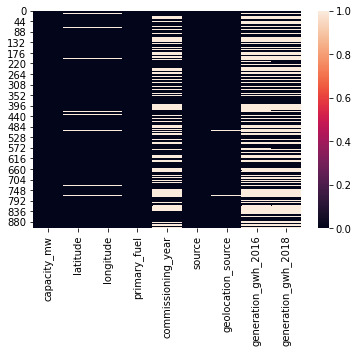

In [17]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

We can clearly observe the white lines in the heat map which indicates the missing values in the dataset.

### Treating null values using imputation techniques.

In [18]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
source                  object
geolocation_source      object
generation_gwh_2016    float64
generation_gwh_2018    float64
dtype: object

In [19]:
from sklearn.impute import SimpleImputer

#For Object dtype columns
imp_O= SimpleImputer(strategy="most_frequent")
df["primary_fuel"]= imp_O.fit_transform(df["primary_fuel"].values.reshape(-1,1))
df["source"]= imp_O.fit_transform(df["source"].values.reshape(-1,1))
df["geolocation_source"]= imp_O.fit_transform(df["geolocation_source"].values.reshape(-1,1))

#For float dtype columns
imp_N= SimpleImputer(strategy="mean")
df["capacity_mw"]= imp_N.fit_transform(df["capacity_mw"].values.reshape(-1,1))
df["latitude"]= imp_N.fit_transform(df["latitude"].values.reshape(-1,1))
df["longitude"]= imp_N.fit_transform(df["longitude"].values.reshape(-1,1))
df["commissioning_year"]= imp_N.fit_transform(df["commissioning_year"].values.reshape(-1,1))
df["generation_gwh_2016"]= imp_N.fit_transform(df["generation_gwh_2016"].values.reshape(-1,1))
df["generation_gwh_2018"]= imp_N.fit_transform(df["generation_gwh_2018"].values.reshape(-1,1))


In [20]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2016,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2467.936859,2600.804099
1,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,WRI,2467.936859,2600.804099
2,39.2,21.9038,69.3732,Wind,1997.091082,CDM,WRI,2467.936859,2600.804099
3,135.0,23.8712,91.3602,Gas,2004.000000,Central Electricity Authority,WRI,886.004428,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.000000,Central Electricity Authority,WRI,6243.000000,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.000000,Central Electricity Authority,WRI,233.596650,686.500000
903,3.0,12.8932,78.1654,Solar,1997.091082,Karnataka Power Corporation Limited,Industry About,2467.936859,2600.804099
904,25.5,15.2758,75.5811,Wind,1997.091082,CDM,WRI,2467.936859,2600.804099
905,80.0,24.3500,73.7477,Coal,1997.091082,Hindustan Zinc ltd,WRI,2467.936859,2600.804099


In [21]:
#Again checking the null values

df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2016    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

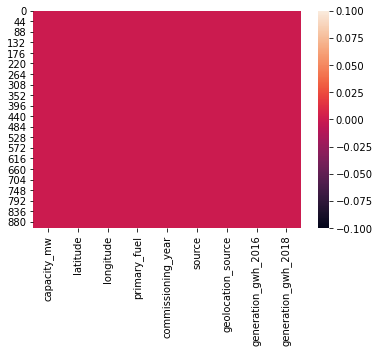

In [22]:
sns.heatmap(df.isnull())

Now there is no null values in any of the columns.

## Statistics Summary

In [23]:
# For all numerical variables
df.describe() 

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2016,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2467.936859,2600.804099
std,590.085456,6.079148,4.812291,13.016360,2877.890004,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,896.500214,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2467.936859,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2467.936859,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,30015.000000,35136.000000


We can observe that the count of the columns are same, which means the dataset is balanced. The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model.

In [24]:
# For all categorical variables
df.select_dtypes(include="object").describe()

,primary_fuel,source,geolocation_source
count,907,907,907
unique,8,191,3
top,Coal,Central Electricity Authority,WRI
freq,258,519,784


count of coal in primary_fuel is higher than maximum. Central Electricity Authority ais the main source of data, and WRI has highest count in geolocation_source

# Data Visualization

### Univariate Analysis

### Categorical column visualization

In [25]:
# Checking the list of counts of primary_fuel
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

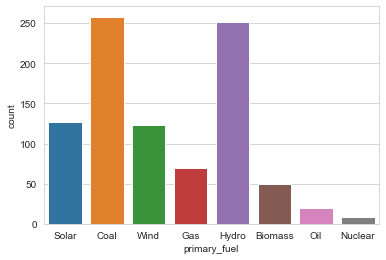

In [26]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

Here We can see that there are 8 chategories of fuel source. 

Also the 'Coal' energy source is used the highest in the generation of electricity. Then the next energy source used is the 'HydroBiomass' and followed by the other energy sources.

In [27]:
# Checking the list of counts of source
df['source'].value_counts()

Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Aravali Infrapower Private Limited (AIPL)      1
Purna Ssk ltd                                  1
Lingandwi                                      1
Sahakar Shiromani vasantrao                    1
Hothur Pvt ltd                                 1
Name: source, Length: 191, dtype: int64

Central Electricity Authority has the highest count. So it is the main source of data .

In [28]:
df['geolocation_source'].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

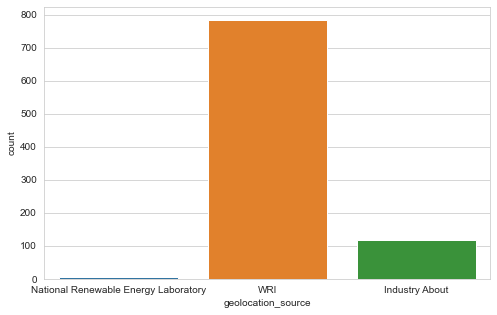

In [29]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
plt.figure(figsize=(8,5))
sns.countplot(df['geolocation_source'])
plt.show()        

Here it can be seen that the count of WRI geolocation_source is the max, which means that the max information is shared by this source.

#### Checking Numerical Columns:

In [30]:
# Checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64

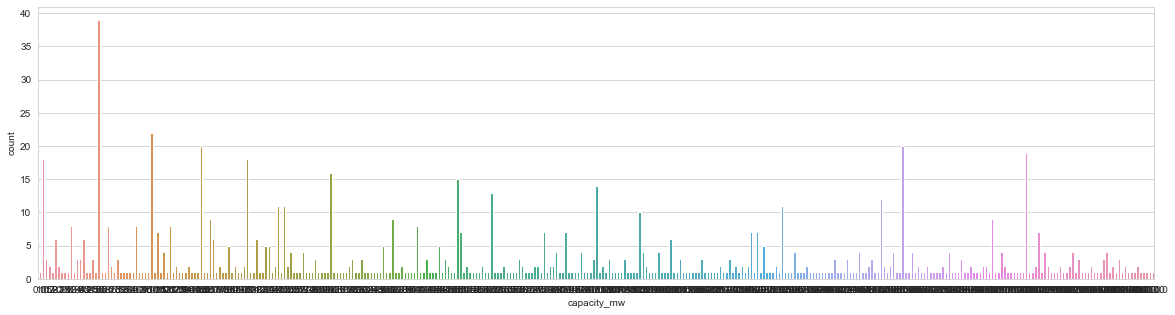

In [31]:
plt.figure(figsize=(20,5))
sns.countplot(df['capacity_mw'])
plt.show()

### Checking the distribution of dataset in numerical columns

In [32]:
#checking the numeric columns for visualization
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)        

['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2016', 'generation_gwh_2018']


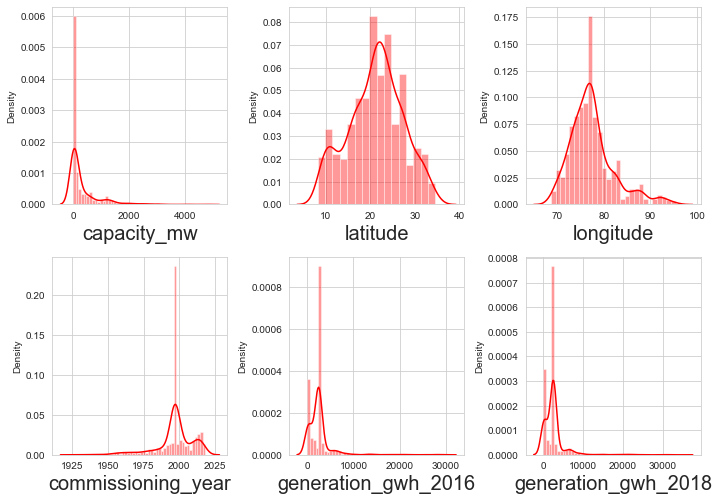

In [33]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Here in the plots we can see that the data is not normally distributed. Outliers and skewness is present, which needs to be treated,

### Bivariate Analysis

### Corealtion between features and targer 'Capacity_mw'

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

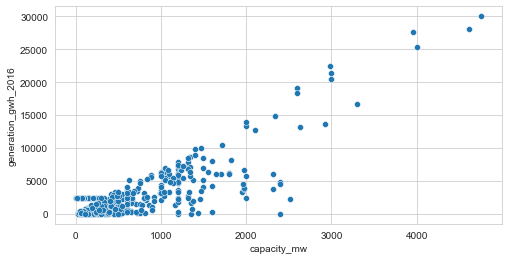

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2018'>

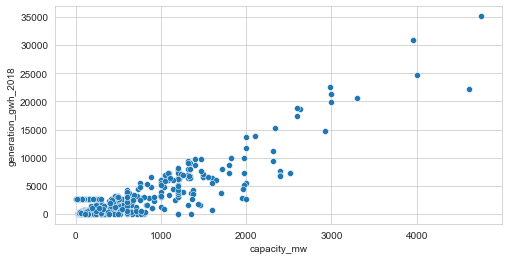

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=df)

This features shows a positive corelation. Here the electricity generation reported over the years has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

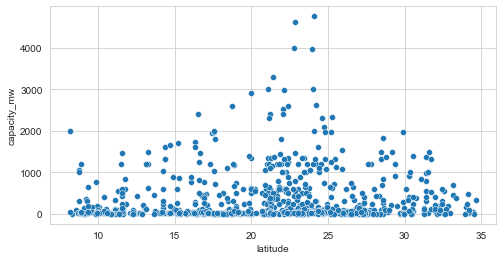

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='latitude',y='capacity_mw',data=df)

In the above scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.

Here this feature do not show any linear relationship.

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

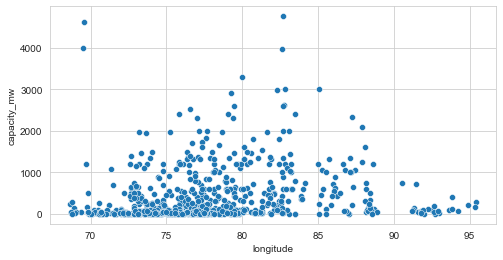

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='longitude',y='capacity_mw',data=df)

In the above scatter plot we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

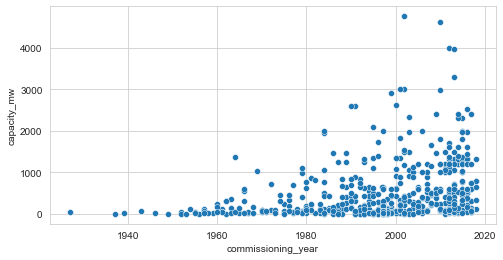

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='commissioning_year',y='capacity_mw',data=df)

In the above scatter plot we can see that the electricity generating capacity measured in mega watts was pretty low in the olden times as compared to recent years due to the invention of efficient fuel types used for power generation.

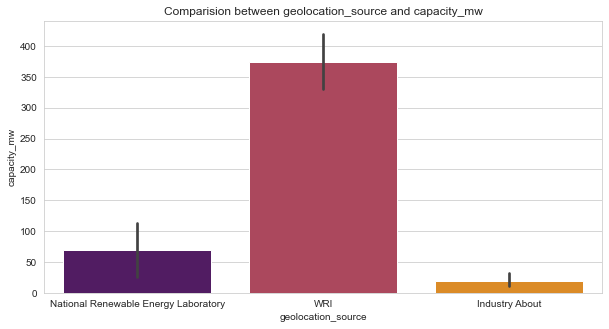

In [39]:
#Checking the relation between target capacity_mw and variable geolocation source
plt.figure(figsize=(10,5))
sns.barplot(x='geolocation_source',y='capacity_mw',data=df,palette='inferno')
plt.title('Comparision between geolocation_source and capacity_mw')
plt.show()

### Correlation between features and target 'Fuel_Types'

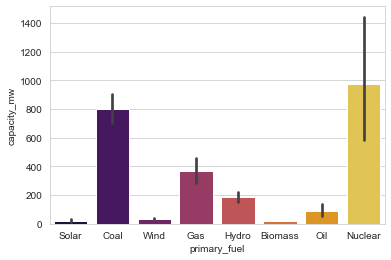

In [40]:
#primary_fuel vs capacity_mw
plt.figure(figsize=(6,4))
sns.barplot(x='primary_fuel',y='capacity_mw',data=df,palette='inferno')
plt.show()

In the above  plot we can see that Nuclear is the main fuel  when it comes to generating electricity and biomass is used the least.

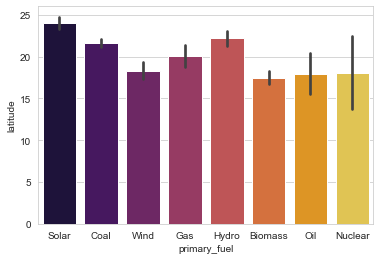

In [41]:
#primary_fuel vs capacity_mw
plt.figure(figsize=(6,4))
sns.barplot(x='primary_fuel',y='latitude',data=df,palette='inferno')
plt.show()

In the above plot we can see thatSolar fuel type is distributed across all the latitude values considering the solar energy that help in generating electricity at a power plant.

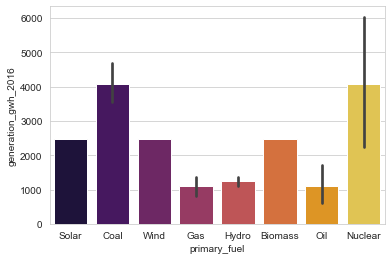

In [42]:
#primary_fuel vs generation_gwh_2016
plt.figure(figsize=(6,4))
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=df,palette='inferno')
plt.show()

Nuclear is the main primary_fuel in generation_gwh_2016.

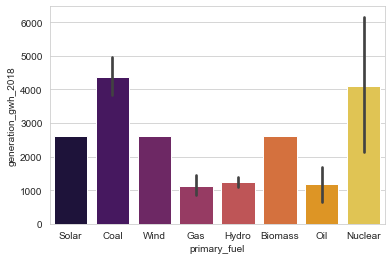

In [43]:
#primary_fuel vs generation_gwh_2018
plt.figure(figsize=(6,4))
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=df,palette='inferno')
plt.show()

Coal is the main primary_fuel in generation_gwh_2018.

## Label Encoding

In [44]:
categorical_col = ['primary_fuel', 'source', 'geolocation_source']

In [45]:
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [46]:
df[categorical_col]

,primary_fuel,source,geolocation_source
0,6,109,1
1,1,174,2
2,7,21,2
3,2,22,2
4,1,22,2
...,...,...,...
902,1,22,2
903,6,77,0
904,7,21,2
905,1,59,2


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2016  907 non-null    float64
 8   generation_gwh_2018  907 non-null    float64
dtypes: float64(6), int32(3)
memory usage: 53.3 KB


## Checking correlation

In [48]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2016,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.274292,-2.421218e-01,2.048653e-01,7.422211e-01,7.734556e-01
latitude,0.050984,1.000000,0.036362,-0.010204,0.102069,5.592656e-02,-1.842751e-01,3.125609e-02,3.132625e-02
longitude,0.195882,0.036362,1.000000,-0.347948,0.092331,-2.393334e-01,2.523426e-01,3.920892e-02,3.777965e-02
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-0.126650,5.361263e-02,-4.832168e-01,-1.310514e-01,-1.369831e-01
commissioning_year,0.274292,0.102069,0.092331,-0.126650,1.000000,2.152776e-02,-7.843657e-03,1.706440e-01,1.743766e-01
source,-0.242122,0.055927,-0.239333,0.053613,0.021528,1.000000e+00,-5.057202e-01,-1.636718e-17,1.092118e-17
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.007844,-5.057202e-01,1.000000e+00,1.115708e-17,-1.048582e-17
generation_gwh_2016,0.742221,0.031256,0.039209,-0.131051,0.170644,-1.636718e-17,1.115708e-17,1.000000e+00,9.571589e-01
generation_gwh_2018,0.773456,0.031326,0.037780,-0.136983,0.174377,1.092118e-17,-1.048582e-17,9.571589e-01,1.000000e+00


<AxesSubplot:>

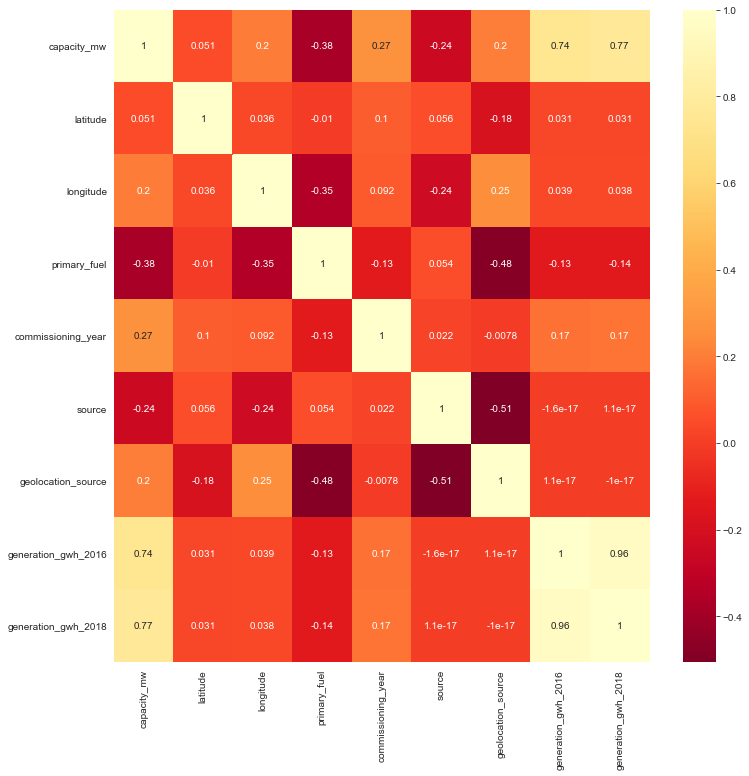

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='YlOrRd_r',annot=True)

### Visualizing the correlation between capacity_mw and features using bar plot

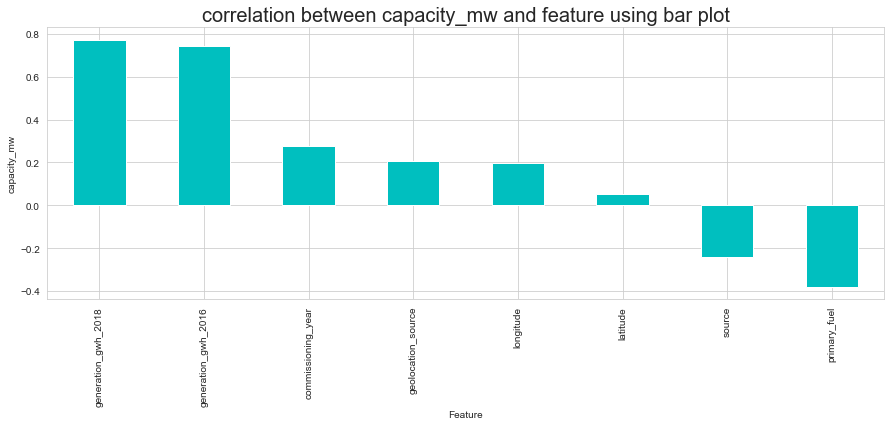

In [50]:
plt.figure(figsize=(15,5))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('capacity_mw',fontsize=10)
plt.title('correlation between capacity_mw and feature using bar plot',fontsize=20)
plt.show()

### Visualizing the correlation between primary_fuel and features using bar plot

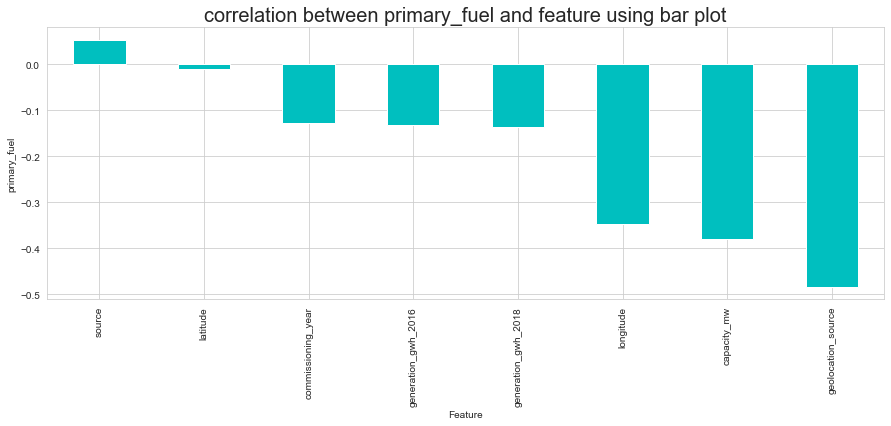

In [51]:
plt.figure(figsize=(15,5))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('correlation between primary_fuel and feature using bar plot',fontsize=20)
plt.show()

OBSERVATIONS:
    
Form the above correlation map and correlation plots, we can see

1. generation_gwh_2018 and generation_gwh_2016 are highly correlated with capacity_mw. Also geolocation_source commisioning_year and longitude has good correlation with capacity_mw.

2. primary_fuel and source is negatively correlated with capacity_mw

3. Other than source, all the columns are negatively correlated with primary_fuel.

4. generation_gwh_2018 and generation_gwh_2016 are highly correlated with each other. Longitude and latitude is also correlated to each other. So there si multicollinearity among few columns. So will try to solve this problem by Checking VIF value before building our models.

## Checking the outliers

capacity_mw               AxesSubplot(0.125,0.536818;0.133621x0.343182)
latitude               AxesSubplot(0.285345,0.536818;0.133621x0.343182)
longitude               AxesSubplot(0.44569,0.536818;0.133621x0.343182)
primary_fuel           AxesSubplot(0.606034,0.536818;0.133621x0.343182)
commissioning_year     AxesSubplot(0.766379,0.536818;0.133621x0.343182)
source                       AxesSubplot(0.125,0.125;0.133621x0.343182)
geolocation_source        AxesSubplot(0.285345,0.125;0.133621x0.343182)
generation_gwh_2016        AxesSubplot(0.44569,0.125;0.133621x0.343182)
generation_gwh_2018       AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

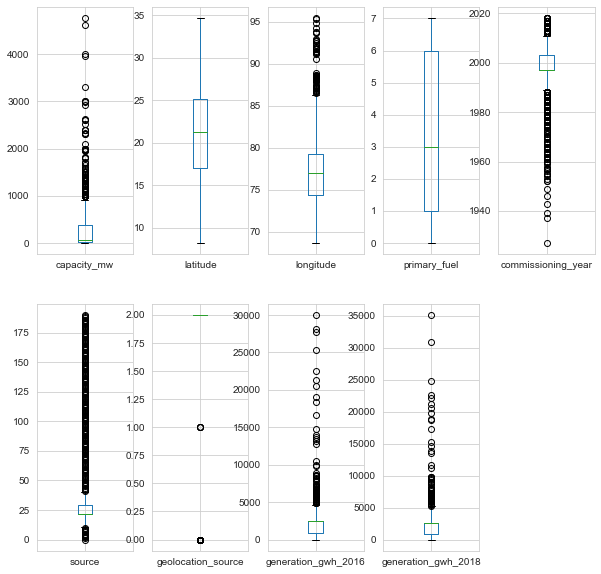

In [52]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(10,10))

There are so many outliers in all the columns except latitude and primary_fuel.

### Removing Outliers

In [53]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

array([[5.48907549e-01, 1.14980517e+00, 8.78279731e-01, ...,
        1.08334929e+00, 0.00000000e+00, 1.50124402e-16],
       [3.86977292e-01, 5.87310989e-01, 5.93788441e-01, ...,
        3.94241396e-01, 0.00000000e+00, 1.50124402e-16],
       [4.86678853e-01, 1.16179322e-01, 1.68239437e+00, ...,
        3.94241396e-01, 0.00000000e+00, 1.50124402e-16],
       ...,
       [5.09908639e-01, 9.74706510e-01, 3.91673420e-01, ...,
        3.94241396e-01, 0.00000000e+00, 1.50124402e-16],
       [4.17498178e-01, 5.18793221e-01, 7.72866383e-01, ...,
        3.94241396e-01, 0.00000000e+00, 1.50124402e-16],
       [5.25169082e-01, 1.85383409e+00, 2.47270171e-03, ...,
        3.94241396e-01, 0.00000000e+00, 1.50124402e-16]])

In [54]:
z.shape

(907, 9)

In [55]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  71,  80, 143, 143, 143, 147, 179, 183, 191, 209,
       209, 209, 222, 244, 299, 308, 308, 308, 321, 323, 333, 340, 342,
       345, 360, 363, 364, 364, 364, 371, 375, 416, 427, 444, 454, 478,
       482, 484, 493, 493, 493, 494, 494, 494, 499, 519, 538, 541, 546,
       573, 577, 583, 592, 601, 621, 638, 648, 648, 648, 657, 657, 657,
       661, 669, 689, 695, 695, 695, 706, 709, 721, 721, 724, 724, 726,
       726, 726, 728, 767, 786, 786, 786, 788, 807, 808, 808, 808, 818,
       832, 847, 848, 870, 871, 879, 880, 880, 880, 895, 900], dtype=int64), array([0, 7, 8, 5, 5, 0, 7, 8, 0, 2, 2, 5, 0, 7, 8, 4, 2, 5, 0, 7, 8, 5,
       2, 2, 2, 4, 5, 2, 0, 0, 7, 8, 4, 0, 2, 2, 4, 4, 4, 0, 4, 0, 7, 8,
       0, 7, 8, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 0, 7, 8, 0, 7, 8, 5,
       5, 5, 0, 7, 8, 4, 4, 7, 8, 7, 8, 0, 7, 8, 4, 0, 0, 7, 8, 0, 4, 0,
       7, 8, 2, 5, 2, 4, 5, 5, 5, 0, 7, 8, 5, 5], dtype=int64))


In [56]:
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2016,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,109,1,2467.936859,2600.804099
1,98.0,24.7663,74.6090,1,1997.091082,174,2,2467.936859,2600.804099
2,39.2,21.9038,69.3732,7,1997.091082,21,2,2467.936859,2600.804099
3,135.0,23.8712,91.3602,2,2004.000000,22,2,886.004428,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,22,2,6243.000000,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.000000,22,2,233.596650,686.500000
903,3.0,12.8932,78.1654,6,1997.091082,77,0,2467.936859,2600.804099
904,25.5,15.2758,75.5811,7,1997.091082,21,2,2467.936859,2600.804099
905,80.0,24.3500,73.7477,1,1997.091082,59,2,2467.936859,2600.804099


In [57]:
print(df.shape)
print(df_new.shape)

(907, 9)
(835, 9)


In [58]:
# Percentage Data loss

loss_percent=(907-835)/907*100
print(loss_percent)

7.938257993384785


7.93% data is lost

## Checking Skewness

In [59]:
df_new.skew()

capacity_mw            1.951725
latitude              -0.113160
longitude              0.911191
primary_fuel           0.414053
commissioning_year    -0.843485
source                 1.786502
geolocation_source    -2.106224
generation_gwh_2016    1.425788
generation_gwh_2018    1.358324
dtype: float64

skewness more than+/- 0.5 will we treated

### Removing skewness using yeo-johnson method

In [60]:
from sklearn.preprocessing import PowerTransformer

The following columns have skewness more than +0.5 and -0.5.

'capacity_mw',"longitude",'commissioning_yera','source','geolocation_source','generation_gwh_2016','generation_gwh_2018'

In [61]:
skew = ['capacity_mw',"longitude",'commissioning_year','source','geolocation_source','generation_gwh_2016','generation_gwh_2018']
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [62]:
df_new[skew] = scaler.fit_transform(df_new[skew].values)
df_new[skew].head()

,capacity_mw,longitude,commissioning_year,source,geolocation_source,generation_gwh_2016,generation_gwh_2018
0,-1.671407,-0.930456,1.279713,1.615940,-2.284315,0.362091,0.377618
1,0.207389,-0.513824,-0.184895,2.090140,0.403637,0.362091,0.377618
2,-0.287387,-2.354133,-0.184895,-0.468138,0.403637,0.362091,0.377618
3,0.379679,2.446285,0.493260,-0.399913,0.403637,-0.666760,-0.905002
4,1.742984,1.248396,1.779350,-0.399913,0.403637,1.901743,2.078748


In [63]:
df_new.skew()

capacity_mw            0.011642
latitude              -0.113160
longitude             -0.000626
primary_fuel           0.414053
commissioning_year     0.027737
source                -0.179941
geolocation_source    -2.078069
generation_gwh_2016   -0.307961
generation_gwh_2018   -0.348291
dtype: float64

The skewness has been removed now

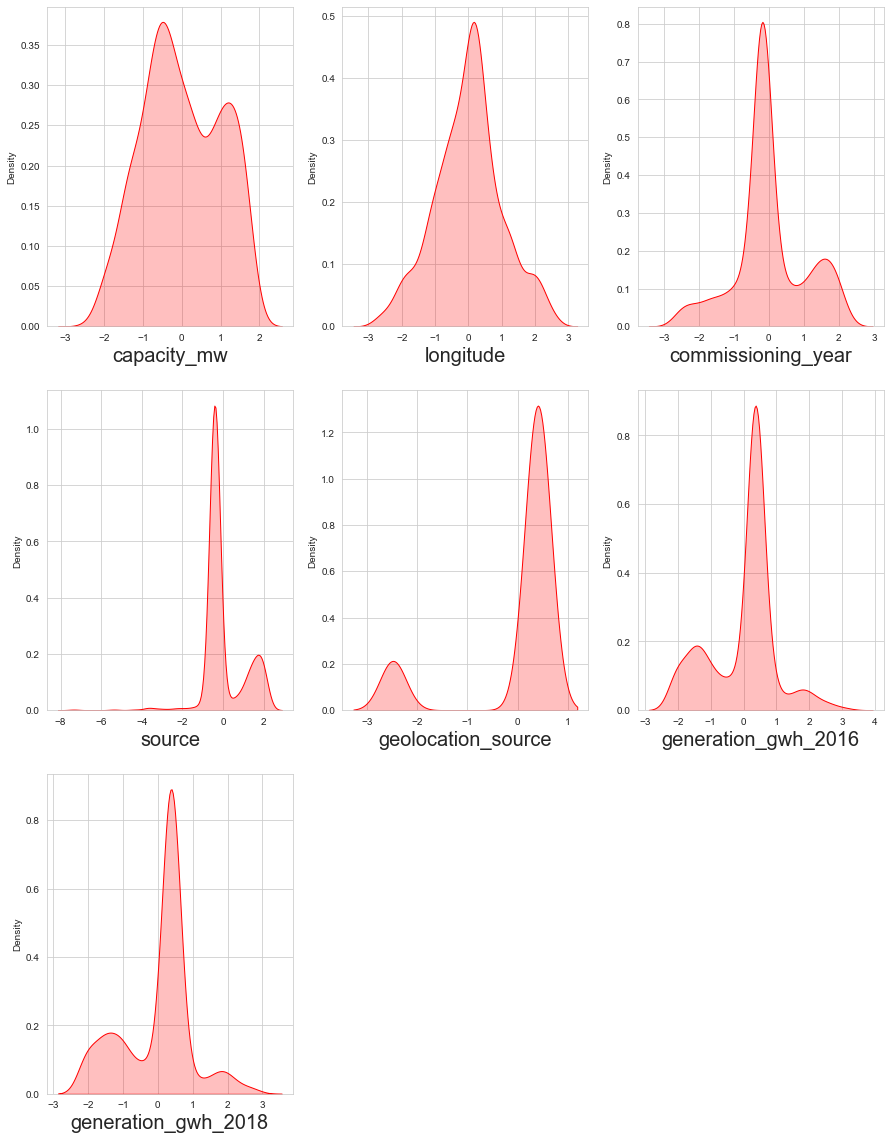

In [64]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in df_new[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column],color='red',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Checking Multi-colinearity

In [65]:
#Seperating the features and target variable

x=df_new.drop('capacity_mw', axis=1)
y=df_new["capacity_mw"]

In [66]:
print(x.shape,'\t',y.shape)

(835, 8) 	 (835,)


In [67]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,3.108026,latitude
1,1.253023,longitude
2,3.519544,primary_fuel
3,1.103210,commissioning_year
4,1.271414,source
5,1.469826,geolocation_source
6,5.838894,generation_gwh_2016
7,5.796370,generation_gwh_2018


Since VIF values in all the columns are less then 10, hence no multicolinearity problem exists after removal of skewness and outliers.

## Feature Scalling

In [68]:
#Scalling the data using Standard Scaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2016,generation_gwh_2018
0,1.153580,-0.930456,1.171419,1.279713,1.615940,-2.284315,0.362091,0.377618
1,0.596482,-0.513824,-0.988773,-0.184895,2.090140,0.403637,0.362091,0.377618
2,0.129870,-2.354133,1.603457,-0.184895,-0.468138,0.403637,0.362091,0.377618
3,0.450573,2.446285,-0.556734,0.493260,-0.399913,0.403637,-0.666760,-0.905002
4,0.139080,1.248396,-0.988773,1.779350,-0.399913,0.403637,1.901743,2.078748
...,...,...,...,...,...,...,...,...
830,-0.784429,0.213054,-0.988773,1.910410,-0.399913,0.403637,-1.400855,-0.847059
831,-1.338935,0.402534,1.171419,-0.184895,1.231642,-2.483840,0.362091,0.377618
832,-0.950551,-0.240976,1.603457,-0.184895,-0.468138,0.403637,0.362091,0.377618
833,0.528622,-0.771409,-0.988773,-0.184895,0.917767,0.403637,0.362091,0.377618


## MODELLING FOR CAPACITY_MW- Regression 

In [69]:
maxScore = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxScore:
        maxScore=acc
        maxRS=i
print('Best score is',maxScore,'on Random State',maxRS)

Best score is 0.5696159874841625 on Random State 170


### Train_test_Split

In [70]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.20, random_state=maxRS)

In [71]:
# Checking train and test data size
print(x_train.shape,'\t',x_test.shape)

(668, 8) 	 (167, 8)


In [72]:
print(y_train.shape,'\t',y_test.shape)

(668,) 	 (167,)


## Checking with different algorithm for best score

In [73]:
# Using algorithms via for loop

model=[LinearRegression(),Lasso(),Ridge(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor()]
for p in model:
    p.fit(x_train,y_train)
    print('Score of', p , 'is:' , p.score(x_train,y_train))
    predp=p.predict(x_test)
    print(f"test_score {p.score(x_test,y_test)}")
    print('Error:')
    print('Mean absolute error:', mean_absolute_error(y_test,predp))
    print('Mean squared error:', mean_squared_error(y_test,predp))
    print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predp)))
    print('r2_score:', r2_score(y_test,predp))
    print('********************************************************************************************')
    print('\n')

Score of LinearRegression() is: 0.41720572022647606
test_score 0.5696159874841625
Error:
Mean absolute error: 0.6004387023228361
Mean squared error: 0.5001459004126695
Root Mean squared error: 0.7072099408327555
r2_score: 0.5696159874841625
********************************************************************************************


Score of Lasso() is: 0.0
test_score -0.01642158900966484
Error:
Mean absolute error: 0.9430334495411896
Mean squared error: 1.1811755921472764
Root Mean squared error: 1.0868190245607943
r2_score: -0.01642158900966484
********************************************************************************************


Score of Ridge() is: 0.4172051940843018
test_score 0.5694272659810493
Error:
Mean absolute error: 0.6006580918911517
Mean squared error: 0.5003652121978587
Root Mean squared error: 0.7073649780685065
r2_score: 0.5694272659810493
********************************************************************************************


Score of SVR() is: 0.689091

KNeighborsRegressor() is giving best r2_score. Also Root mean squared error is less in KNN(). So selecting that model

### Using Ensemble Technique to boostup score

In [74]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=170)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))
print('r2_score:', r2_score(y_test,predrf))

score: 0.9609196893096321


Mean absolute error: 0.27666700766114805
Mean squared error: 0.1469614360243946
Root Mean squared error: 0.3833554956230504
r2_score: 0.87353719690778


In [75]:
from sklearn.ensemble import AdaBoostRegressor


ad=AdaBoostRegressor(base_estimator=lr,n_estimators=20,learning_rate=1.0,random_state=160)
ad.fit(x_train,y_train)
print('score:',ad.score(x_train,y_train))
predad=ad.predict(x_test)
print('\n')
print('Mean absolute error:', mean_absolute_error(y_test,predad))
print('Mean squared error:', mean_squared_error(y_test,predad))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test,predad)))
print('r2_score:', r2_score(y_test,predad))

score: 0.4109403584050506


Mean absolute error: 0.6249180014808606
Mean squared error: 0.5308304969509736
Root Mean squared error: 0.7285811533048145
r2_score: 0.543211372811347


In [76]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

predgb=gb.predict(x_test)
print('r2_score:',r2_score(y_test,predgb))

# Mean Absolute Error (MAE)
print('Mean absolute error:',metrics.mean_absolute_error(y_test, predgb))

# Mean Squared Error (MSE)
print('Mean squared error:',metrics.mean_squared_error(y_test, predgb))

# Root Mean Squared Error (RMSE)
print("Root Mean squared error:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

r2_score: 0.8344374949171
Mean absolute error: 0.3228952734155102
Mean squared error: 0.19239889440878594
Root Mean squared error: 0.4386329837219107


## Cross- Validation

In [77]:
Train_accuracy= r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("/n")
    

At cross fold 2 the cv score is 0.775753646480698 and accuracy score for training is -0.3686135564775106 and accuracy for the testing is -0.443627855228645
/n
At cross fold 3 the cv score is 0.778338191913171 and accuracy score for training is -0.3686135564775106 and accuracy for the testing is -0.443627855228645
/n
At cross fold 4 the cv score is 0.786381305364374 and accuracy score for training is -0.3686135564775106 and accuracy for the testing is -0.443627855228645
/n
At cross fold 5 the cv score is 0.785900033056572 and accuracy score for training is -0.3686135564775106 and accuracy for the testing is -0.443627855228645
/n
At cross fold 6 the cv score is 0.7817154238673472 and accuracy score for training is -0.3686135564775106 and accuracy for the testing is -0.443627855228645
/n
At cross fold 7 the cv score is 0.7817558467816136 and accuracy score for training is -0.3686135564775106 and accuracy for the testing is -0.443627855228645
/n
At cross fold 8 the cv score is 0.7925758230

We are getting highest cv score at cv=8

In [78]:
# Cross validate of RandomForestClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x,y,cv=8,scoring='r2',verbose=1,n_jobs=-1)
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.2s finished


Score: [0.80089583 0.71877663 0.82752633 0.76526094 0.80135366 0.84225727
 0.75020385 0.83433207]
Mean Score: 0.7925758230270646
Standard Deviation: 0.04118168448257834


## Hyper Parameter Tuning for the model with best acc and cv score

In [79]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [80]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=8)

In [81]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [82]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [83]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [84]:
capacity_mw = RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto', n_estimators=200)
capacity_mw.fit(x_train, y_train)
pred = capacity_mw.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 86.14108192764688
RMSE value: 0.3833554956230504


After HyperParameter Tuning, we are getting an accuracy score of 86%

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

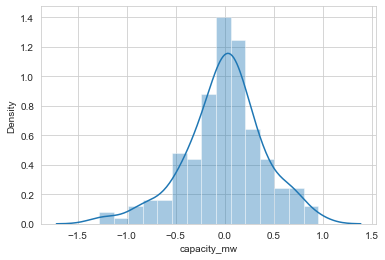

In [85]:
sns.distplot(pred-y_test)

## Saving the model

In [86]:
import joblib
joblib.dump(capacity_mw,"Global_Power_Plant_capacity_mw_REGRESSION.pkl")

['Global_Power_Plant_capacity_mw_REGRESSION.pkl']

# 2.MODELLING FOR PRIMARY_FUEL-Classification model

### Seperating the Dataset into Features and Label(primary_fuel)

In [87]:
x_pf = df_new.drop("primary_fuel", axis=1)
y_pf = df_new["primary_fuel"]

In [88]:
print(x_pf.shape,'\t',y_pf.shape)

(835, 8) 	 (835,)


### Feature Scalling

In [89]:
scaler=StandardScaler()
x_pf=pd.DataFrame(scaler.fit_transform(x_pf),columns=x_pf.columns)
x_pf

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2016,generation_gwh_2018
0,-1.671407,1.153580,-0.930456,1.279713,1.615940,-2.284315,0.362091,0.377618
1,0.207389,0.596482,-0.513824,-0.184895,2.090140,0.403637,0.362091,0.377618
2,-0.287387,0.129870,-2.354133,-0.184895,-0.468138,0.403637,0.362091,0.377618
3,0.379679,0.450573,2.446285,0.493260,-0.399913,0.403637,-0.666760,-0.905002
4,1.742984,0.139080,1.248396,1.779350,-0.399913,0.403637,1.901743,2.078748
...,...,...,...,...,...,...,...,...
830,1.682327,-0.784429,0.213054,1.910410,-0.399913,0.403637,-1.400855,-0.847059
831,-1.594007,-1.338935,0.402534,-0.184895,1.231642,-2.483840,0.362091,0.377618
832,-0.519077,-0.950551,-0.240976,-0.184895,-0.468138,0.403637,0.362091,0.377618
833,0.097965,0.528622,-0.771409,-0.184895,0.917767,0.403637,0.362091,0.377618


## OverSampling-SMOTE Analysis

In [90]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(x_pf,y_pf)

In [91]:
y_sm.value_counts()

0    232
1    232
2    232
3    232
4    232
5    232
6    232
7    232
Name: primary_fuel, dtype: int64

In [92]:
x_sm.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2016,generation_gwh_2018
0,-1.671407,1.153580,-0.930456,1.279713,1.615940,-2.284315,0.362091,0.377618
1,0.207389,0.596482,-0.513824,-0.184895,2.090140,0.403637,0.362091,0.377618
2,-0.287387,0.129870,-2.354133,-0.184895,-0.468138,0.403637,0.362091,0.377618
3,0.379679,0.450573,2.446285,0.493260,-0.399913,0.403637,-0.666760,-0.905002
4,1.742984,0.139080,1.248396,1.779350,-0.399913,0.403637,1.901743,2.078748


## Modelling

### Getting the best random state

In [93]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x_sm,y_sm,random_state=i,test_size=0.30)
    LR = LogisticRegression()
    LR.fit(x1_train,y1_train)
    predrf= LR.predict(x1_test)
    acc=accuracy_score(y1_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best score is',maxAcc,'on Random State',maxRS)

Best score is 0.7666068222621185 on Random State 175


### Creating train_test_split

In [94]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_sm,y_sm,test_size=.30,random_state=maxRS)

In [95]:
# Checking train and test data size
print(x1_train.shape,'\t',x1_test.shape)

(1299, 8) 	 (557, 8)


In [96]:
print(y1_train.shape,'\t',y1_test.shape)

(1299,) 	 (557,)


### Checking with different algorithm for best score

In [97]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),]

for m in model:
    m.fit(x1_train,y1_train)
    m.score(x1_train,y1_train)
    predm=m.predict(x1_test)
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y1_test,predm))
    print(confusion_matrix(y1_test,predm))
    print(classification_report(y1_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.7666068222621185
[[66  0  0  0  0  0  0  4]
 [ 7 35  5  6  6  1  0  1]
 [ 1  8 36  7  6  8  0  1]
 [ 0  8  8 35  5  6  0 18]
 [ 0  2  4  3 65  0  0  0]
 [ 2  0  1  1  0 63  0  6]
 [ 0  1  0  0  0  0 65  0]
 [ 0  1  0  3  0  0  0 62]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        70
           1       0.64      0.57      0.60        61
           2       0.67      0.54      0.60        67
           3       0.64      0.44      0.52        80
           4       0.79      0.88      0.83        74
           5       0.81      0.86      0.83        73
           6       1.00      0.98      0.99        66
           7       0.67      0.94      0.78        66

    accuracy                           0.77       557
   macro avg       0.76      0.77      0.76       557
weighted avg       0.76      0.77      0.76       557



Accuracy score of GaussianNB() is:
0.585278276481149
[[70  0  0  0  

We are getting highest accuracy with DecisionTreeClassifier() which is 87%.

### Using Ensemble Technique to boostup score

In [98]:
# Checking accuracy for Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x1_train,y1_train)

# Prediction
predrfc = rfc.predict(x1_test)

print(accuracy_score(y1_test, predrfc))
print(confusion_matrix(y1_test, predrfc))
print(classification_report(y1_test,predrfc))

0.933572710951526
[[69  1  0  0  0  0  0  0]
 [ 4 47  2  4  3  1  0  0]
 [ 0  4 59  0  1  3  0  0]
 [ 0  1  4 74  1  0  0  0]
 [ 0  0  1  0 72  1  0  0]
 [ 1  2  3  0  0 67  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 66]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        70
           1       0.85      0.77      0.81        61
           2       0.86      0.88      0.87        67
           3       0.95      0.93      0.94        80
           4       0.94      0.97      0.95        74
           5       0.93      0.92      0.92        73
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00        66

    accuracy                           0.93       557
   macro avg       0.93      0.93      0.93       557
weighted avg       0.93      0.93      0.93       557



In [99]:
# Checking accuracy for Gradient Boosting Classifier
GBc = GradientBoostingClassifier()
GBc.fit(x1_train,y1_train)

# Prediction
predGBc = GBc.predict(x1_test)

print(accuracy_score(y1_test, predGBc))
print(confusion_matrix(y1_test, predGBc))
print(classification_report(y1_test,predGBc))

0.9210053859964094
[[68  2  0  0  0  0  0  0]
 [ 3 47  5  3  2  1  0  0]
 [ 0  4 57  1  2  3  0  0]
 [ 0  3  6 69  2  0  0  0]
 [ 0  2  1  1 69  1  0  0]
 [ 1  0  0  0  0 72  0  0]
 [ 0  1  0  0  0  0 65  0]
 [ 0  0  0  0  0  0  0 66]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        70
           1       0.80      0.77      0.78        61
           2       0.83      0.85      0.84        67
           3       0.93      0.86      0.90        80
           4       0.92      0.93      0.93        74
           5       0.94      0.99      0.96        73
           6       1.00      0.98      0.99        66
           7       1.00      1.00      1.00        66

    accuracy                           0.92       557
   macro avg       0.92      0.92      0.92       557
weighted avg       0.92      0.92      0.92       557



In [100]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier(n_estimators=100,random_state=75,base_estimator=DecisionTreeClassifier(),algorithm='SAMME',learning_rate=0.01)
adc.fit(x1_train,y1_train)
adc_pred=adc.predict(x1_test)
print(accuracy_score(y1_test,adc_pred))
print(confusion_matrix(y1_test,adc_pred))
print(classification_report(y1_test,adc_pred))

0.8904847396768402
[[69  1  0  0  0  0  0  0]
 [ 2 39  6  4  5  5  0  0]
 [ 0  6 56  1  1  3  0  0]
 [ 0  2  6 70  2  0  0  0]
 [ 0  2  5  1 65  1  0  0]
 [ 1  2  5  0  0 65  0  0]
 [ 0  0  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0 66]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        70
           1       0.75      0.64      0.69        61
           2       0.72      0.84      0.77        67
           3       0.92      0.88      0.90        80
           4       0.89      0.88      0.88        74
           5       0.88      0.89      0.88        73
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00        66

    accuracy                           0.89       557
   macro avg       0.89      0.89      0.89       557
weighted avg       0.89      0.89      0.89       557



Random Forest Classifier(rfc) is giving the better score than DecisionTreeClassifier. So Hypertuning Random Forest Classifier

In [101]:
from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(rfc,x_sm,y_sm,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("/n")
    

At cross fold 2 the cv score is 0.9154094827586207 and accuracy score for training is -0.3686135564775106 and accuracy for the testing is -0.443627855228645
/n
At cross fold 3 the cv score is 0.929416029263889 and accuracy score for training is -0.3686135564775106 and accuracy for the testing is -0.443627855228645
/n
At cross fold 4 the cv score is 0.9261853448275862 and accuracy score for training is -0.3686135564775106 and accuracy for the testing is -0.443627855228645
/n
At cross fold 5 the cv score is 0.9304987972060401 and accuracy score for training is -0.3686135564775106 and accuracy for the testing is -0.443627855228645
/n
At cross fold 6 the cv score is 0.9299578940042453 and accuracy score for training is -0.3686135564775106 and accuracy for the testing is -0.443627855228645
/n
At cross fold 7 the cv score is 0.9332043045619439 and accuracy score for training is -0.3686135564775106 and accuracy for the testing is -0.443627855228645
/n
At cross fold 8 the cv score is 0.9331896

We are getting highest cv score at cv=8

In [102]:
# Cross validate of RandomForestClassifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,x_sm,y_sm,cv=8,scoring='r2',verbose=1,n_jobs=-1)
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.3s finished


Score: [0.96223317 0.93103448 0.95648604 0.93513957 0.93021346 0.90640394
 0.95402299 0.95648604]
Mean Score: 0.9415024630541873
Standard Deviation: 0.01783589699256188


## HyperParameter Tuning for the model with best score

In [103]:
#Random Forest Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [104]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=8)

In [105]:
GCV.fit(x1_train,y1_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [106]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

These are the best parameters

In [107]:
primary_fuel =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
primary_fuel.fit(x1_train, y1_train)
pred = primary_fuel.predict(x1_test)
acc=accuracy_score(y1_test,pred)
print(acc*100)

91.74147217235189


After HyperParameter tuning we have received an accuracy score of 91%

## AUC ROC Curve

Since it is a multiclass classifier, so we will apply OneVsrestClassifier to make AUC ROC curve between each pair of one class against other classes together.

In [108]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

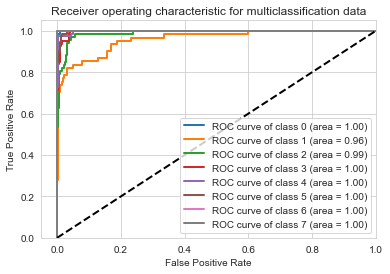

In [109]:
classifier = OneVsRestClassifier(primary_fuel)
y_score = classifier.fit(x1_train, y1_train).predict_proba(x1_test)

#Binarize the output
y1_test_bin  = label_binarize(y1_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y1_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

## Conclusion:

The accuracy score for primary_fuel is 92%

The accuracy score for capacity_mw is 86.5%

### Saving the Model

In [110]:
import joblib
joblib.dump(capacity_mw,"Global_Power_Plant_primary_fuel_classification.pkl")

['Global_Power_Plant_primary_fuel_classification.pkl']